# 0Ô∏è‚É£ Inicializar ambiente

In [317]:
# Este bloque es con la finalidad de garantizar que existan todas las dependencias, independiente donde se ejecute este notebook.

import subprocess
import sys
from importlib.metadata import version

# Imprimimos datos del entorno.
print("üü¶ List Environment")
capture = subprocess.run([sys.executable, "--version"],capture_output=True, text=True)
captureText = capture.stdout.strip() or capture.stderr.strip()
print(f"‚úÖ {captureText}")
capture = subprocess.run([sys.executable, "-m", "pip", "--version"] ,capture_output=True, text=True)
captureText = capture.stdout.strip() or capture.stderr.strip()
print(f"‚úÖ {captureText}")
print("", end="\n\n")

print("üü¶ Instalando bibliotecas externas")

print("‚úÖ Instalando numpy")
# Ejecutamos el comando de consola, python -m pip install numpy y la salida de ese comando la mandamos al dispositivo /dev/null para que no salga en pantalla.
# Este comando nos permite instalar la lib numpy con el gestor de paquetes de Python pip.
subprocess.run([sys.executable, "-m", "pip", "install", "numpy"], stdout=subprocess.DEVNULL) 
# Como estamos seguros de la instalaci√≥n de la library procedemos a importar.
import numpy as numpy

# Se hace el mismo paso para todas las libraries que no vienen en los m√≥dulos o paquetes est√°ndar de Python.
print("‚úÖ Instalando pandas")
subprocess.run([sys.executable, "-m", "pip", "install", "pandas"], stdout=subprocess.DEVNULL)
import pandas as pandas

print("‚úÖ Installing matplotlib")
subprocess.run([sys.executable, "-m", "pip", "install", "matplotlib"], stdout=subprocess.DEVNULL)
import matplotlib as matplotlib

print("‚úÖ Installing seaborn")
subprocess.run([sys.executable, "-m", "pip", "install", "seaborn"], stdout=subprocess.DEVNULL)
import seaborn as sns

print("‚úÖ Installing tabulate") # Revisar Python Tabulate: A Full Guide - https://www.datacamp.com/tutorial/python-tabulate
subprocess.run([sys.executable, "-m", "pip", "install", "tabulate"], stdout=subprocess.DEVNULL)
from tabulate import tabulate 

print("‚úÖ Installing pillow")
subprocess.run([sys.executable, "-m", "pip", "install", "pillow"], stdout=subprocess.DEVNULL)
import PIL as pillow

print("‚úÖ Installing requests")
subprocess.run([sys.executable, "-m", "pip", "install", "requests"], stdout=subprocess.DEVNULL)
import requests


# Importando otras bibliotecas(libraries)
import matplotlib.pyplot as plt
import datetime
import random

üü¶ List Environment
‚úÖ Python 3.13.5
‚úÖ pip 25.1.1 from c:\Users\Megam\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip (python 3.13)


üü¶ Instalando bibliotecas externas
‚úÖ Instalando numpy
‚úÖ Instalando pandas
‚úÖ Installing matplotlib
‚úÖ Installing seaborn
‚úÖ Installing tabulate
‚úÖ Installing pillow
‚úÖ Installing requests


# 1Ô∏è‚É£ Generar Dataset

In [ ]:
# Estas constantes permite modificar el experimento. Modificar a conveniencia del tester.
DATA_SIZE = 1000  # N√∫mero total de registros del dataset(DataFrame) a generar.
PRODUCT_QUANTITY = 1000  # N√∫mero total de productos a generar.
CUSTOMER_QUANTITY = 1000  # N√∫mero total de productos a generar.
TRANSACTION_MAX_ITEMS = (
    20  # N√∫mero m√°ximo de items de ventade productos en una transacci√≥n a generar.
)
POSITIVE_NUMBER_THRESHOLD = 90  # Umbral para generar un valor num√©rico positivo, si es menor o igual a 90 se toma el valor positivo y si es mayor se toma otro valor.
NOT_NULL_VALUE_THRESHOLD = 90  # Umbral para generar un valor no nulo, si es menor o igual a 90 se toma el valor no nulo y si es mayor se toma nulo(None).
MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM = (
    100  # Maximo de cantidad de productos en un item de la transacci√≥n.
)
MIN_PRODUCT_PRICE = 1.00  # Precio m√≠nimo de un producto.
MAX_PRODUCT_PRICE = 500.00  # Precio m√°ximo de un producto.


# Esta funci√≥n muestra informaci√≥n de un pandas.DataFrame con es su informaci√≥n, descripci√≥n, las primeras filas y las √∫ltimas filas.
def DisplayDataFrameInfo(
    df: pandas.DataFrame,
    title,
    showInfo=True,
    showDescription=True,
    showHead=True,
    showTail=True,
    headQty=5,
    tailQty=5,
):
    print(f"üü¶ DataFrame - {title}")
    if showInfo:
        print("‚úÖ Info")
        print()
    print(df.info())
    if showDescription:
        print("‚úÖ Describe")
        print(df.describe())
        print()
    if showHead:
        print("‚úÖ Head")
        # Utilizamos tabulate que nos permite imprimir de manera elegante la tabla.
        print(tabulate(df.head(headQty), headers="keys", tablefmt="fancy_grid"))
        print()
    if showTail:
        print("‚úÖ Tail")
        print(tabulate(df.tail(tailQty), headers="keys", tablefmt="fancy_grid"))
        print()


# Esta funci√≥n ayuda a seleccionar uno de los dos valores al azar, si valor obtenido al azar entre 1 y 100 es menor o igual que el umbral se toma el primer valor y si es mayor al umbral se toma el segundo valor.
def SelectValueBelowOrEqualsThreshold(threshold: int, value1, value2):
    threshold = threshold % 100
    return value1 if random.randint(0, 100) <= threshold else value2


# Funcion que permite generar todo el dataset
def GenerateRandomData():
    # Nombres de ciudades precargadas para no generar datos abstractos al ojo humano.
    cities = [
        "Quito",
        "Guayaquil",
        "Cuenca",
        "Santo Domingo",
        "Machala",
        "Portoviejo",
        "Loja",
        "Ambato",
        "UIO"
        "Riobamba",
        "Ibarra",
        "Latacunga",
        "Esme",
        "Quitof",
        "Babahoyo",
        "Tulc√°n",
        "GYE",
        "Tena",
        "Puyo",
        "Nueva Loja",
        "Zamora",
        "Macas",
        "Esmeraldas",
        "Guaranda",
        "Puerto Baquerizo Moreno",
        "Azogues",
        "Santa Elena",
        "Francisco de Orellana",
    ]

    # Nombres de categor√≠as de productos con sus respectivos nombres de productos precargados para no generar datos abstractos al ojo humano.
    categories = {
        "Alimentos": sorted(
            [
                "Arroz",
                "Aceite",
                "Fideos",
                "Az√∫car",
                "Sal",
                "At√∫n",
                "Lentejas",
                "Galletas",
                "Caf√©",
                "Leche",
            ]
        ),
        "Belleza": sorted(
            [
                "Shampoo",
                "Acondicionador",
                "Crema facial",
                "Maquillaje",
                "Perfume",
                "Desodorante",
                "Toallas h√∫medas",
                "Gel",
                "Tinte",
                "Jab√≥n",
            ]
        ),
        "Deportes": sorted(
            [
                "Bal√≥n de f√∫tbol",
                "Bicicleta",
                "Raqueta",
                "Pesas",
                "Guantes",
                "Colchoneta",
                "Casco",
                "Cuerda para saltar",
                "Protector bucal",
                "Gafas deportivas",
            ]
        ),
        "Electr√≥nica": sorted(
            [
                "Celular",
                "Laptop",
                "PC",
                "Tablet",
                "Auriculares",
                "Smartwatch",
                "C√°mara",
                "Monitor",
                "Cargador",
                "Teclado",
            ]
        ),
        "Ferreter√≠a": sorted(
            [
                "Martillo",
                "Destornillador",
                "Taladro",
                "Sierra",
                "Llave inglesa",
                "Clavos",
                "Tornillos",
                "Cinta m√©trica",
                "Nivel",
                "Brochas",
            ]
        ),
        "Hogar": sorted(
            [
                "S√°banas",
                "Almohadas",
                "Colch√≥n",
                "Cortinas",
                "Toallas",
                "Manteles",
                "Vasos",
                "Cubiertos",
                "Platos",
                "Escoba",
            ]
        ),
        "Jugueter√≠a": sorted(
            [
                "Mu√±eca",
                "Pelota",
                "Autito",
                "Lego",
                "Rompecabezas",
                "Patineta",
                "Dron",
                "Juguete educativo",
                "Carrito",
                "Peluche",
            ]
        ),
        "Limpieza": sorted(
            [
                "Detergente",
                "Desinfectante",
                "Jab√≥n l√≠quido",
                "Limpiavidrios",
                "Trapeador",
                "Escoba",
                "Limpiador multiusos",
                "Esponja",
                "Cloro",
                "Ambientador",
            ]
        ),
        "Moda": sorted(
            [
                "Camisa",
                "Pantal√≥n",
                "Vestido",
                "Zapatos",
                "Falda",
                "Chaqueta",
                "Bufanda",
                "Sombrero",
                "Corbata",
                "Medias",
            ]
        ),
        "Tecnolog√≠a": sorted(
            [
                "Router",
                "Disco duro",
                "USB",
                "Laptop",
                "Monitor",
                "Impresora",
                "Teclado",
                "Mouse",
                "Altavoces",
                "Webcam",
            ]
        ),
    }

    # Nombres de m√©todos de pago precargados para no generar datos abstractos al ojo humano.
    paymentMethods = [
        "Tarjeta de cr√©dito",
        "Tarjeta de d√©bito",
        "Efectivo",
        "Transferencia bancaria",
        "Pago m√≥vil",
    ]

    # Generando los productos, generando la cantidad especificada en las constantes. Se selecciona un nombre de categor√≠a al azar y luego de esa categor√≠a se selecciona un nombre de producto al azar.
    # aparte los productos tienen su precio unitario.
    products = []
    for i in range(PRODUCT_QUANTITY):
        category = random.choice(
            list(categories.keys())
        )  # Seleccionar una categor√≠a al azar.
        products.append(
            {
                "Producto_SKU": f"Producto-{str(i).rjust(6, '0')}",
                # Se toma un nombre de producto de la categoria y se le agrega Producto m√°s el valor del iterador. Ejemplo "Computadora Producto 50"
                "Nombre_Producto": f"{random.choice(categories[category])} Producto {i}",
                "Categoria_Producto": category,
                # Asignar valores positivos, negativos y ceros.
                "Precio_Unitario": SelectValueBelowOrEqualsThreshold(
                    POSITIVE_NUMBER_THRESHOLD,
                    round(random.uniform(MIN_PRODUCT_PRICE, MAX_PRODUCT_PRICE), 2),
                    random.choice([-1.00, 0.00]),
                ),
            }
        )

    # Generando los identificadores de clientes.
    customers = []
    for i in range(CUSTOMER_QUANTITY):
        customers.append({"ID_Client": f"Cliente-{str(i).rjust(6, '0')}"})

    # Generando las transacciones.
    transactions = []
    counter = 0
    invoiceSequential = 1
    while counter < DATA_SIZE:
        transactionItemsQty = random.randint(1, TRANSACTION_MAX_ITEMS)
        # Generar un nombre para la transacci√≥n.
        transactionID = f"Factura-{str(invoiceSequential).rjust(6, '0')}"

        # Obtener un cliente al azar para la transaci√≥n.
        transactionCustomer = customers[random.randint(0, CUSTOMER_QUANTITY - 1)]

        # Obtener una fecha para la transaccion.
        transactionDatetime = datetime.datetime.now() - datetime.timedelta(
            days=random.randint(0, 365)
        )

        # La fecha al azar puede ser de tipo tipo str o datetime.
        transactionDatetime = (
            transactionDatetime
            if (random.choice([True, False]))
            else transactionDatetime.strftime("%Y-%m-%d %H:%M:%S")
        )

        # Obtener un m√©todo de pago al azar para esta transacci√≥n.
        paymentMethod = random.choice(paymentMethods)

        # Generar una ciudad al azar o nulo para la transacci√≥n.
        transactionCity = SelectValueBelowOrEqualsThreshold(
            NOT_NULL_VALUE_THRESHOLD, random.choice(cities), None
        )

        # Si las filas/registros que faltan por generar son menores al n√∫mero m√°ximo de items en una transacci√≥n se procede a tomar la cantidad restante para llegar a la cantidad total del dataset generado.
        if DATA_SIZE - counter <= TRANSACTION_MAX_ITEMS:
            transactionItemsQty = DATA_SIZE - counter

        for _ in range(transactionItemsQty):
            product = products[random.randint(0, PRODUCT_QUANTITY - 1)]
            transactions.append(
                {
                    "ID_Transaccion": transactionID,
                    "ID_Cliente": transactionCustomer["ID_Client"],
                    "Fecha_Transaccion": transactionDatetime,
                    "Producto_SKU": product["Producto_SKU"],
                    "Nombre_Producto": product["Nombre_Producto"],
                    # Generar cantidad positiva, negativa, exagerada o cero.
                    "Cantidad_Producto": SelectValueBelowOrEqualsThreshold(
                        POSITIVE_NUMBER_THRESHOLD,
                        random.randint(1, MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM),
                        random.choice(
                            [-1, 0, MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM + 99000]
                        ),
                    ),
                    "Precio_Unitario": product["Precio_Unitario"],
                    "Categoria_Producto": product["Categoria_Producto"],
                    "Metodo_Pago": paymentMethod,
                    "Ciudad_Envio": transactionCity,
                    "Calificacion_Producto": SelectValueBelowOrEqualsThreshold(
                        NOT_NULL_VALUE_THRESHOLD, random.randint(1, 5), None
                    ),
                }
            )
        counter += transactionItemsQty
        invoiceSequential += 1
    return pandas.DataFrame(transactions)


print("üü¶ Generando dataset")
df = GenerateRandomData()
print("‚úÖ Dataset generado")

üü¶ Generando dataset
‚úÖ Dataset generado


# 2Ô∏è‚É£ Explorar datos

In [319]:
# Muestra las primeras filas del DataFrame (head()). 
# o Obt√©n un resumen conciso del DataFrame, incluyendo tipos de datos y valores no nulos (info()). 
# o Calcula estad√≠sticas descriptivas para las columnas num√©ricas (describe()). 
DisplayDataFrameInfo(df, "Original")

# Identifica y cuantifica la presencia de valores nulos por columna 
print("‚úÖ Nulos en cada columna")
nullsByColumn = df.isnull().sum()
print(nullsByColumn)
print()

# Explora la cantidad de valores √∫nicos y las categor√≠as m√°s frecuentes para las columnas categ√≥ricas. 
print("‚úÖ Columnas categ√≥ricas - Cantidad de valores √∫nicos y moda(categor√≠as m√°s frecuentes para la columna)")
catColumns = [
    "Metodo_Pago",
    "Ciudad_Envio",
    "Categoria_Producto",
    "Nombre_Producto",
    "Calificacion_Producto"
]
for catColumn in catColumns:
    print(f"üìå Columna: {catColumn}")
    print(f"   ‚ñ´Ô∏èValores √∫nicos: {df[catColumn].nunique(dropna=True)}")
    modes = df[catColumn].mode()
    frecuencies = df[catColumn].value_counts()
    print(f"   ‚ñ´Ô∏èModas")
    for mode in modes:
        print(f"      Moda: {mode}, Frecuencia: {frecuencies[mode]}")
print()

üü¶ DataFrame - Original
‚úÖ Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Transaccion         1000 non-null   object 
 1   ID_Cliente             1000 non-null   object 
 2   Fecha_Transaccion      1000 non-null   object 
 3   Producto_SKU           1000 non-null   object 
 4   Nombre_Producto        1000 non-null   object 
 5   Cantidad_Producto      1000 non-null   int64  
 6   Precio_Unitario        1000 non-null   float64
 7   Categoria_Producto     1000 non-null   object 
 8   Metodo_Pago            1000 non-null   object 
 9   Ciudad_Envio           937 non-null    object 
 10  Calificacion_Producto  901 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB
None
‚úÖ Describe
       Cantidad_Producto  Precio_Unitario  Calificacion_Producto
count        1000.000000      1000.0

# 3Ô∏è‚É£ Limpiar y preprocesar los datos

In [320]:
# Manejo de Nulos: Implementa una estrategia para gestionar los valores nulos (e.g., rellenar con la media/mediana, la moda, o eliminar filas/columnas si la cantidad de nulos es significativa y justificada). Justifica tu elecci√≥n.
# JUSTIFICACION: Se escogi√≥ la moda ya que es el valor que m√°s se repite y lo m√°s probable que en esos datos NaN puedan ser el valor de moda. Pero como son datos discretos en forma de categor√≠as o conjuntos de valores sin extremos grandes la moda es la escogida.
# Ciudad_Envio y Calificacion_Producto
cityMode = df["Ciudad_Envio"].mode()
ratingMode = df["Calificacion_Producto"].mode()
cityMode = cityMode.iloc[random.randint(0, cityMode.count()-1)] # Obteniendo cualquiera de las modas al azar
ratingMode = ratingMode.iloc[random.randint(0, ratingMode.count()-1)] # Obteniendo cualquiera de las modas al azar
df["Ciudad_Envio"] = df["Ciudad_Envio"].fillna(cityMode)
df["Calificacion_Producto"] = df["Calificacion_Producto"].fillna(ratingMode)


# Conversi√≥n de Tipos: Aseg√∫rate de que Fecha_Transaccion sea de tipo datetime. Convierte otras columnas a tipos correctos si es necesario. 
# Normalizaci√≥n de Texto (Opcional, pero valorado): Si hay inconsistencias en columnas de texto como Ciudad_Envio, aplica t√©cnicas b√°sicas para estandarizarlas (e.g., convertir a min√∫sculas, arreglar errores tipogr√°ficos simples).
df["ID_Transaccion"] = df["ID_Transaccion"].astype(str).str.strip().str.upper()
df["ID_Cliente"] = df["ID_Cliente"].astype(str).str.strip().str.upper()
df["Fecha_Transaccion"] = pandas.to_datetime(df["Fecha_Transaccion"])
df["Producto_SKU"] = df["Producto_SKU"].astype(str).str.strip().str.upper()
df["Nombre_Producto"] = df["Nombre_Producto"].astype(str).str.strip().str.upper()
df["Cantidad_Producto"] = df["Cantidad_Producto"].astype(int)
df["Precio_Unitario"] = df["Precio_Unitario"].astype(float)
df["Categoria_Producto"] = df["Categoria_Producto"].astype(str).str.strip().str.upper()
df["Metodo_Pago"] = df["Metodo_Pago"].astype(str).str.strip().str.upper()
df["Ciudad_Envio"] = df["Ciudad_Envio"].astype(str).str.strip().str.upper()
df["Calificacion_Producto"] = df['Calificacion_Producto'].astype(int)

df['Ciudad_Envio'] = df['Ciudad_Envio'].replace({
    'Esme': 'Esmeraldas',
    'Quitof': 'Quito',
    'UIO': 'Quito',
    'GYE': 'Guayaquil',
    'UIO': 'Quito',
})

# Validaci√≥n de Datos Num√©ricos: Identifica y, si es apropiado, gestiona valores an√≥malos o at√≠picos en Cantidad y Precio_Unitario (o al menos documenta su presencia).
df = df[
    (df["Cantidad_Producto"] > 0) &
    (df["Cantidad_Producto"] <= MAX_PRODUCT_QUANTITY_PER_TRANSACTION_ITEM)
]
df = df[
    (df["Precio_Unitario"] >= MIN_PRODUCT_PRICE) &
    (df["Precio_Unitario"] <= MAX_PRODUCT_PRICE)
]

DisplayDataFrameInfo(df, "Limpiado y preprocesado", showTail = False)

üü¶ DataFrame - Limpiado y preprocesado
‚úÖ Info

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID_Transaccion         816 non-null    object        
 1   ID_Cliente             816 non-null    object        
 2   Fecha_Transaccion      816 non-null    datetime64[ns]
 3   Producto_SKU           816 non-null    object        
 4   Nombre_Producto        816 non-null    object        
 5   Cantidad_Producto      816 non-null    int64         
 6   Precio_Unitario        816 non-null    float64       
 7   Categoria_Producto     816 non-null    object        
 8   Metodo_Pago            816 non-null    object        
 9   Ciudad_Envio           816 non-null    object        
 10  Calificacion_Producto  816 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 76.5+ KB


# 4Ô∏è‚É£ Ingenier√≠a de Caracter√≠sticas (B√°sica)

In [321]:
# Crea una nueva columna Valor_Total_Transaccion si no existe, calcul√°ndola como Cantidad * Precio_Unitario. 
df["Valor_Total_Transaccion"] = df["Cantidad_Producto"].astype(float) * df["Precio_Unitario"].astype(float)

# Extrae el A√±o, Mes, y D√≠a_Semana de la columna Fecha_Transaccion y crea nuevas columnas para cada uno.
df["Anio"] = df["Fecha_Transaccion"].dt.year
df["Mes_Numero"] = df["Fecha_Transaccion"].dt.month
df["Mes_Nombre"] = df["Fecha_Transaccion"].dt.month_name()
df["Dia_Semana_Numero"] = df["Fecha_Transaccion"].dt.weekday
df["Dia_Semana_Nombre"] = df["Fecha_Transaccion"].dt.day_name()

DisplayDataFrameInfo(df, "Con Columnas agregadas", showTail = False)

üü¶ DataFrame - Con Columnas agregadas
‚úÖ Info

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_Transaccion           816 non-null    object        
 1   ID_Cliente               816 non-null    object        
 2   Fecha_Transaccion        816 non-null    datetime64[ns]
 3   Producto_SKU             816 non-null    object        
 4   Nombre_Producto          816 non-null    object        
 5   Cantidad_Producto        816 non-null    int64         
 6   Precio_Unitario          816 non-null    float64       
 7   Categoria_Producto       816 non-null    object        
 8   Metodo_Pago              816 non-null    object        
 9   Ciudad_Envio             816 non-null    object        
 10  Calificacion_Producto    816 non-null    int64         
 11  Valor_Total_Transaccion  816 non-null    float64    

# 5Ô∏è‚É£ An√°lisis y Agregaci√≥n de Datos

In [ ]:
# Ventas totales por Categor√≠a_Producto
print("‚úÖ Ventas totales por categor√≠a de producto")
ventas_por_categoria_prod = df.groupby('Categoria_Producto')['Valor_Total_Transaccion'].sum().reset_index()
ventas_por_categoria_prod = ventas_por_categoria_prod.sort_values(by='Valor_Total_Transaccion', ascending=False)
print((ventas_por_categoria_prod))
print()

# El n√∫mero de transacciones por Metodo_Pago.
print("‚úÖ Transacciones por m√©todo de pago")
transacciones_metodos = df[['ID_Transaccion', 'Metodo_Pago']].drop_duplicates()
transacciones_metodos = transacciones_metodos['Metodo_Pago'].value_counts().reset_index()
transacciones_metodos.columns = ["Metodo_Pago", "Total_Transacciones"]
print((transacciones_metodos))
print()

# TOP 10 productos m√°s vendidos por Valor_Total_Transaccion
print("‚úÖ Productos m√°s vendidos por valor total")
top_10_productos = (
    df.groupby('Nombre_Producto')['Valor_Total_Transaccion']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print(top_10_productos)
print()

# El n√∫mero de transacciones y el valor total por mes (utilizando la columna Mes creada).
print("‚úÖ Transacciones y ventas totales por mes")
ventas_transacciones_mensuales = df.groupby(['Anio', 'Mes_Nombre', 'Mes_Numero']).agg(
    Total_Transacciones=('ID_Transaccion', 'nunique'),
    Total_Ventas=('Valor_Total_Transaccion', 'sum')
).reset_index()
print(ventas_transacciones_mensuales)
print()

# La calificaci√≥n promedio por Categoria_Producto.
print("‚úÖ Calificacion promedio por categor√≠a de producto")
calificacion_promedio = df.groupby("Categoria_Producto")["Calificacion_Producto"].mean().reset_index()
print(calificacion_promedio)
print()

‚úÖ Ventas totales por categor√≠a de producto
  Categoria_Producto  Valor_Total_Transaccion
0          ALIMENTOS               1379845.59
2           DEPORTES               1212869.85
1            BELLEZA               1153124.11
7           LIMPIEZA               1138511.96
5              HOGAR               1012165.30
3        ELECTR√ìNICA                984747.62
8               MODA                969644.36
6         JUGUETER√çA                941474.39
4         FERRETER√çA                868621.69
9         TECNOLOG√çA                751566.20

‚úÖ Transacciones por m√©todo de pago
              Metodo_Pago  Total_Transacciones
0              PAGO M√ìVIL                   31
1                EFECTIVO                   21
2       TARJETA DE D√âBITO                   19
3  TRANSFERENCIA BANCARIA                   16
4      TARJETA DE CR√âDITO                   13

‚úÖ Productos m√°s vendidos por valor total
               Nombre_Producto  Valor_Total_Transaccion
0           LECHE P

# 6Ô∏è‚É£ Visualizaci√≥n de Datos

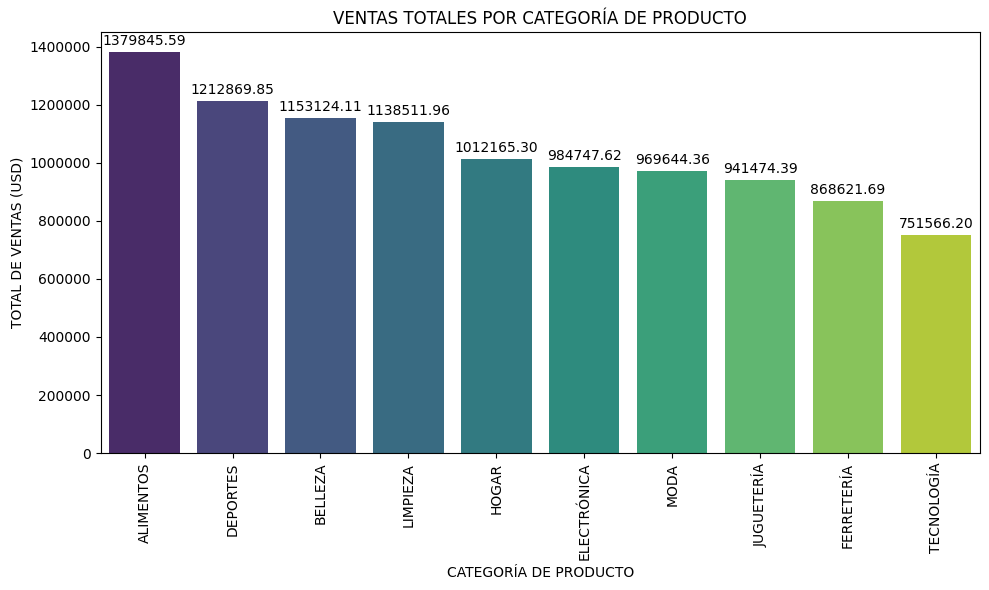

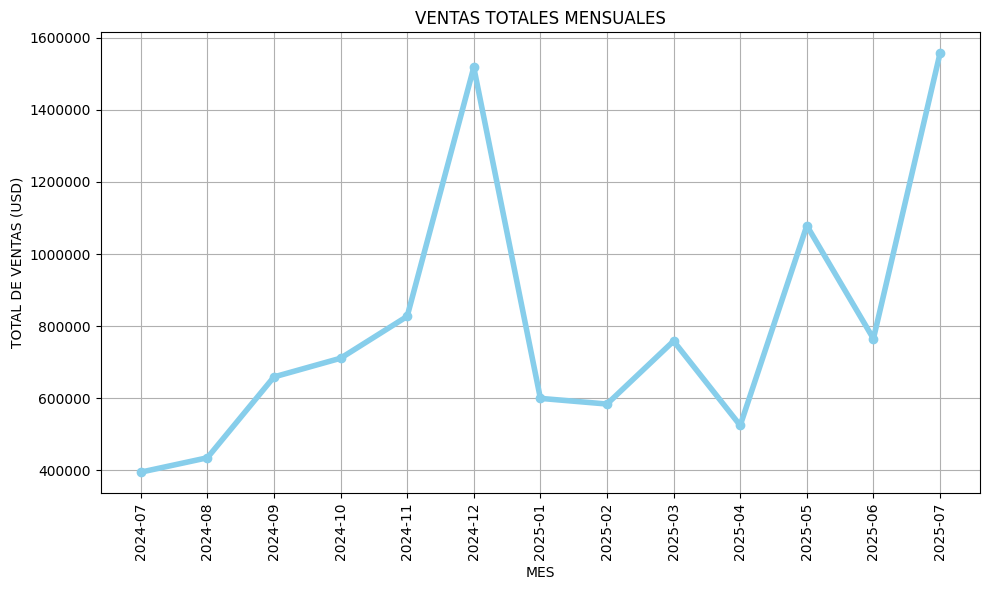

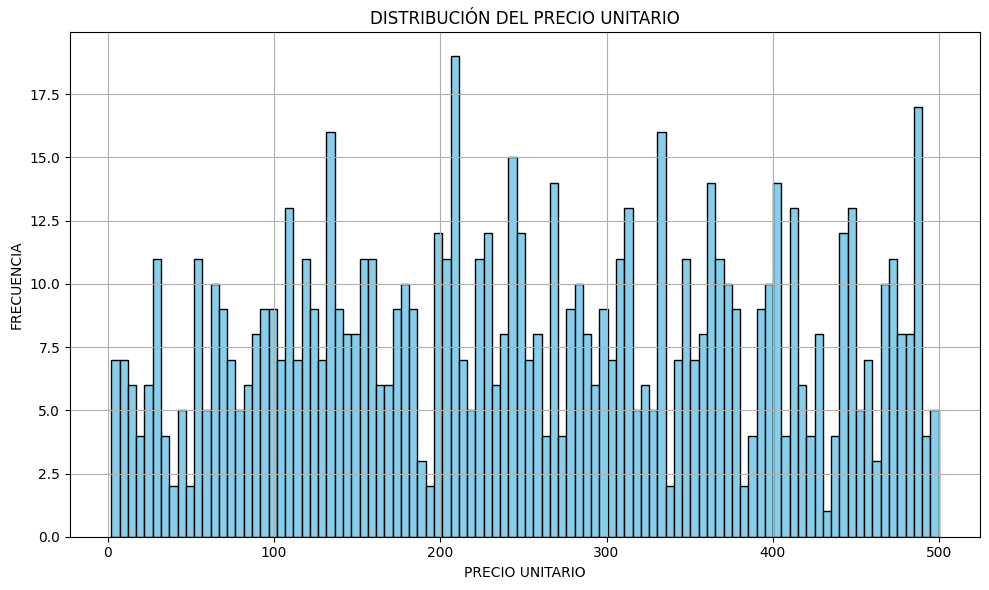

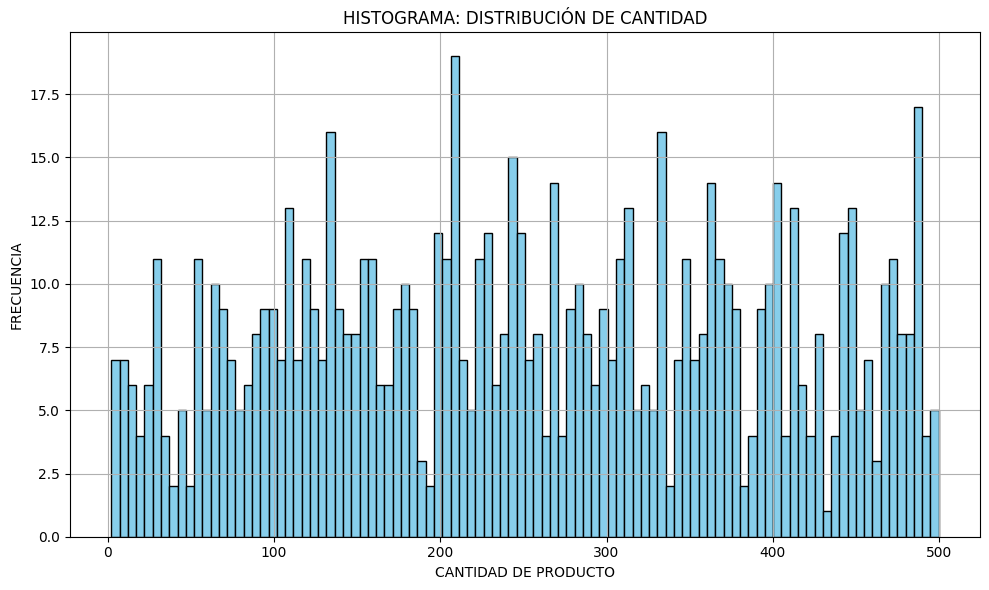

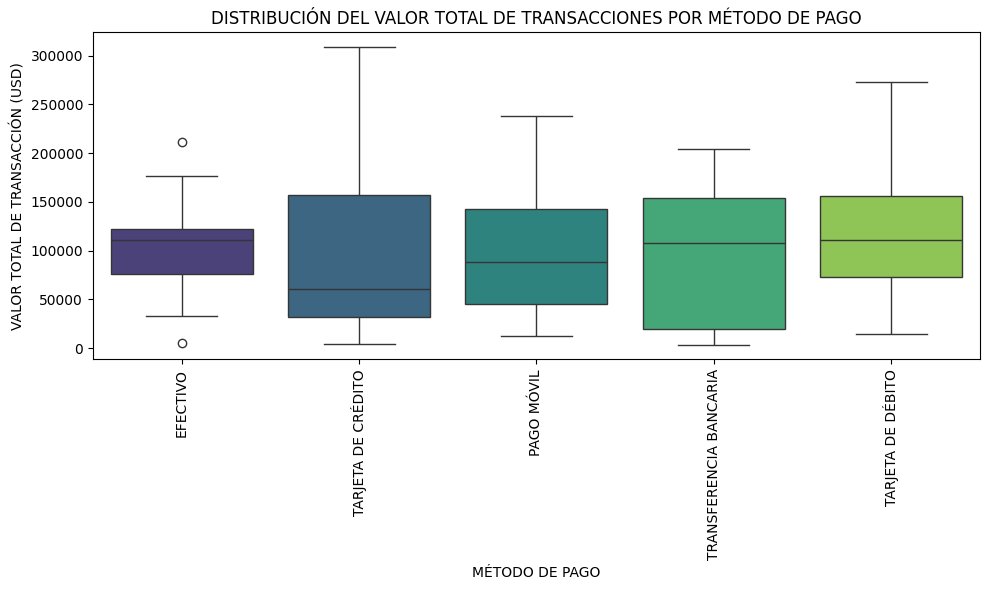


Gr√°fico 'Calificaci√≥n del Producto vs. Cantidad' guardado como 'calificacion_vs_cantidad_productos.png'.


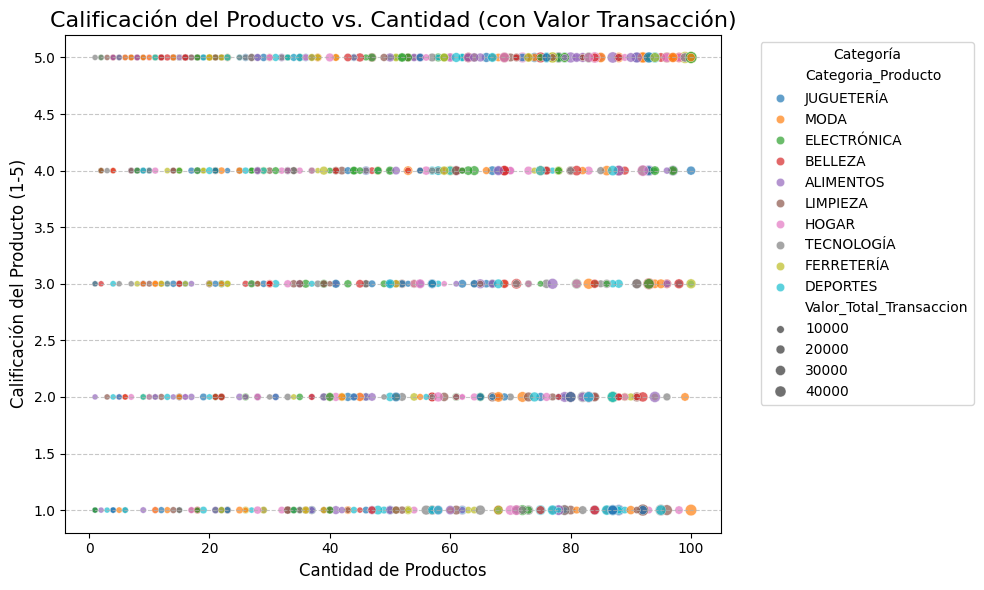

In [323]:
# Un gr√°fico de barras de ventas totales por categor√≠a de producto.
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=ventas_por_categoria_prod,
    x="Categoria_Producto",
    y="Valor_Total_Transaccion",
    hue="Categoria_Producto",
    palette="viridis",
    legend=False,
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=3)
ax.ticklabel_format(style="plain", axis="y")
plt.title("Ventas totales por categor√≠a de producto".upper())
plt.xlabel("Categor√≠a de Producto".upper())
plt.ylabel("Total de Ventas (USD)".upper())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Un gr√°fico de l√≠neas de las ventas totales a lo largo del tiempo (por mes o a√±o).
analisis_mensual = (
    df.groupby(["Anio", "Mes_Numero"])["Valor_Total_Transaccion"]
    .sum()
    .reset_index(name="Valor_Total_Ventas")
)
analisis_mensual["Mes_Anio"] = (
    analisis_mensual["Anio"].astype(str)
    + "-"
    + analisis_mensual["Mes_Numero"].astype(str).str.zfill(2)
)
analisis_mensual = analisis_mensual.sort_values(by="Mes_Anio")
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    analisis_mensual["Mes_Anio"],
    analisis_mensual["Valor_Total_Ventas"],
    marker="o",
    color="skyblue",
    linewidth=4,
)
ax.ticklabel_format(style="plain", axis="y")
ax.set_xticks(analisis_mensual["Mes_Anio"])
ax.set_title("Ventas totales mensuales".upper())
ax.set_xlabel("Mes".upper())
ax.set_ylabel("Total de Ventas (USD)".upper())
ax.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Histograma: Distribuci√≥n del Precio Unitario o cantidad
plt.figure(figsize=(10, 6))
plt.hist(df["Precio_Unitario"].dropna(), bins=100, color="skyblue", edgecolor="black")
plt.title("Distribuci√≥n del Precio Unitario".upper())
plt.xlabel("Precio Unitario".upper())
plt.ylabel("Frecuencia".upper())
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["Precio_Unitario"].dropna(), bins=100, color="skyblue", edgecolor="black")
plt.title("Histograma: Distribuci√≥n de cantidad".upper())
plt.xlabel("Cantidad de producto".upper())
plt.ylabel("Frecuencia".upper())
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: Valor Total de Transacci√≥n por M√©todo de Pago
transacciones_metodos = (
    df.groupby(["ID_Transaccion", "Metodo_Pago"])["Valor_Total_Transaccion"]
    .sum()
    .reset_index()
)
transacciones_metodos = transacciones_metodos.sort_values(
    by="ID_Transaccion", ascending=True
)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=transacciones_metodos,
    x="Metodo_Pago",
    y="Valor_Total_Transaccion",
    palette="viridis",
    hue="Metodo_Pago",
    legend=False,
)
plt.title("Distribuci√≥n del Valor Total de Transacciones por M√©todo de Pago".upper())
plt.xlabel("M√©todo de Pago".upper())
plt.ylabel("Valor Total de Transacci√≥n (USD)".upper())
plt.xticks(rotation=90)
plt.tight_layout()
# Guardar figura
plt.savefig("BoxPlot")
plt.show()

# Scatter Plot: Calificaci√≥n vs Cantidad
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    x="Cantidad_Producto",
    y="Calificacion_Producto",
    hue="Categoria_Producto",
    data=df,
    size="Valor_Total_Transaccion",
    alpha=0.7,
    ax=ax,
)
ax.set_title(
    "Calificaci√≥n del Producto vs. Cantidad (con Valor Transacci√≥n)", fontsize=16
)
ax.set_xlabel("Cantidad de Productos", fontsize=12)
ax.set_ylabel("Calificaci√≥n del Producto (1-5)", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)  
plt.legend(
    title="Categor√≠a", bbox_to_anchor=(1.05, 1), loc="upper left"
) 
plt.tight_layout()
# Guardar esta figura
plt.savefig("calificacion_vs_cantidad_productos.png")
print(
    "\nGr√°fico 'Calificaci√≥n del Producto vs. Cantidad' guardado como 'calificacion_vs_cantidad_productos.png'."
)
plt.show()

# 7Ô∏è‚É£ Conclusiones y Reflexi√≥n
Para el presente ejercicio pr√°ctico el desaf√≠o grande era programar en Python ya que ninguno de los que estamos en el grupo tenemos contacto directo con este lenguaje de programaci√≥n. Pero se nos dio la oportunidad y contra todo problema se meti√≥ esfuerzo para aprender y poder cumplir con lo requerido.

Otro desaf√≠o fue tener cambiar de perspectiva con relaci√≥n a como se programa en otros lenguajes de programaci√≥n(Java, C#) versus Python. Hay varias instrucciones que nos dejan asombrados por la forma de hacer mucho en pocas l√≠neas de c√≥digo, todo gracias a los desarrolladores de estas excelentes libraries.

## Conclusiones
üü° El presente ejercicio pr√°ctico nos ayuda a agregar conocimientos extras que no discutieron en la clase s√≠ncrona, a reforzar lo aprendido. Pero a tener el compromiso de seguir investigando y mejorando.   

üü° Pandas es una library muy vers√°til con simples instrucciones nos evita toda la abstracci√≥n de tener que hacer calculos con grandes cantidades de datos de manera manual o tener que programarlos. Se logra ahorrar mucho c√≥digo, se hace mucho en pocas l√≠neas y expresiones.   

üü° Las libs para generar los gr√°ficos PyPlot y Seaborn son bien potentes, se puede generar toda clase de gr√°ficos. Lo m√°s importante de todo es que son gratuitas, no se debe invertir dinero para hacer gr√°ficos profesionales.   

üü° Python tiene un gran ecosistema de libraries gratuitas y de pago para ser utilizadas por nosotros como futuros cient√≠ficos de datos.   

üü° Python al tener enteros de precisi√≥n arbitraria se puede almacenar y hacer c√°lculos con cualquier clase de n√∫meros sin tener que preocuparse por errores de tama√±os de tipos(overflow) como sucede en otros lenguajes.   

üü° En el dataset propuesto, encontramos que solo existe un item/art√≠culos por transacci√≥n. En la vida real cuando una persona se va de compras, esta adquiere varios art√≠culos en una sola compra. Se mejor√≥ el dise√±o del dataset generado sint√©ticamente, hay una transacci√≥n y en cada transacci√≥n hay varias compras de art√≠culos, la transacci√≥n solo contiene una fecha √∫nica.   

üü° Para ejecutar el notebook de manera correcta en distintos entorno, sistemas, dispositivo se debe controlar mediante programaci√≥n las dependencias externas a instalar antes de que se ejecuten las instrucciones que importan o llaman esas dependencias. El presente notebook se puede ejecutar en distintos ambientes sin problema entre los cuales est√°n probados un kernel local de Python(m√°quinas de cada integrante del grupo), un kerner remoto de Jupyter lab, Google colab.    

## Recomendaciones
üü° Probar cada uno de los m√©todos que proporciona la API de Pandas. Siempre tener cuidado con usar referencias si lo que se quiere es modificar el dataset original volver a reasignar la variable para obtener los cambios.

üü° Profundizar a detalle en el manejo de las libs para generar gr√°ficos. Se requiere m√°s tiempo para profundizar a detalle y hacer unos gr√°ficos m√°s estilizados y profesionales.  
 
üü° Cambiar solo las constantes para controlar la generaci√≥n del dataset para el experimento. Se requiere hacer validaci√≥n para comprobar los valores de las constantes(limitaci√≥n del tiempo), pero si el desarrollador o cient√≠fico de datos coloca bien los valores, el dataset se generar√° sin inconvenientes.   